# 二分类实例
1. 如何端到端地完成一个分类问题的模型
2. 如何通过数据转换提高模型的准确度
3. 如何通过调参提高模型的准确度
4. 如何通过集成算法提高模型的准确度

In [3]:
# 导入类库
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas.plotting import scatter_matrix
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings("ignore")
# 导入数据
filename = '../data/sonar.all-data.csv'
dataset = read_csv(filename, header=None)
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
# 数据维度
print(dataset.shape)

# 查看数据类型
set_option('display.max_rows', 500)
#print(dataset.dtypes)

(208, 61)


In [7]:
# 描述性统计信息
set_option('precision', 3)
print(dataset.describe())

# 数据的分类分布
print(dataset.groupby(60).size())

            0          1        2        3        4   ...         55         56         57         58         59
count  208.000  2.080e+02  208.000  208.000  208.000  ...  2.080e+02  2.080e+02  2.080e+02  2.080e+02  2.080e+02
mean     0.029  3.844e-02    0.044    0.054    0.075  ...  8.222e-03  7.820e-03  7.949e-03  7.941e-03  6.507e-03
std      0.023  3.296e-02    0.038    0.047    0.056  ...  5.736e-03  5.785e-03  6.470e-03  6.181e-03  5.031e-03
min      0.002  6.000e-04    0.002    0.006    0.007  ...  4.000e-04  3.000e-04  3.000e-04  1.000e-04  6.000e-04
25%      0.013  1.645e-02    0.019    0.024    0.038  ...  4.400e-03  3.700e-03  3.600e-03  3.675e-03  3.100e-03
50%      0.023  3.080e-02    0.034    0.044    0.062  ...  6.850e-03  5.950e-03  5.800e-03  6.400e-03  5.300e-03
75%      0.036  4.795e-02    0.058    0.065    0.100  ...  1.058e-02  1.043e-02  1.035e-02  1.033e-02  8.525e-03
max      0.137  2.339e-01    0.306    0.426    0.401  ...  3.940e-02  3.550e-02  4.400e-02  3.64

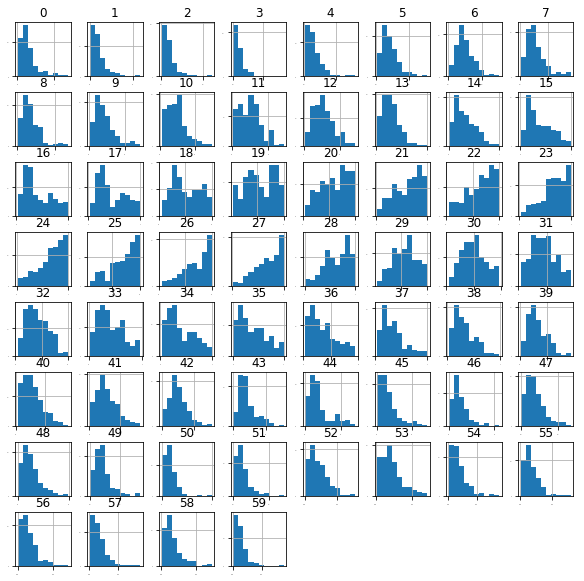

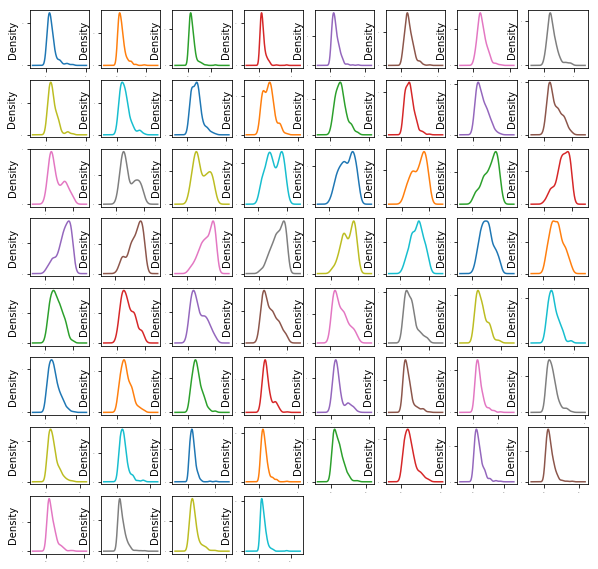

In [9]:
# 直方图
dataset.hist(sharex=False, sharey=False,xlabelsize=1, ylabelsize=1, figsize=(10,10))
pyplot.show()

# 密度图
dataset.plot(kind='density', subplots=True, layout=(8, 8), figsize=(10,10), sharex=False, legend=False, fontsize=1)
pyplot.show()

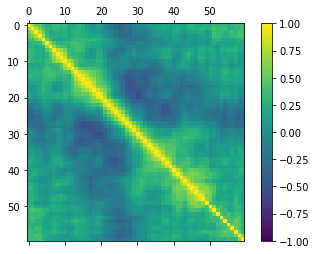

In [10]:
# 关系矩阵图
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

In [11]:
# 分离评估数据集
array = dataset.values
X = array[:, 0:60].astype(float)
Y = array[:, 60]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# 评估算法的基准
num_folds = 10
seed = 7
scoring = 'accuracy'

# 评估算法 - 原始数据
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()
results = []
for key in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    print('%s : %f (%f)' % (key, cv_results.mean(), cv_results.std()))

LR : 0.782721 (0.093796)
LDA : 0.746324 (0.117854)
KNN : 0.808088 (0.067507)
CART : 0.747794 (0.089471)
NB : 0.648897 (0.141868)
SVM : 0.608824 (0.118656)


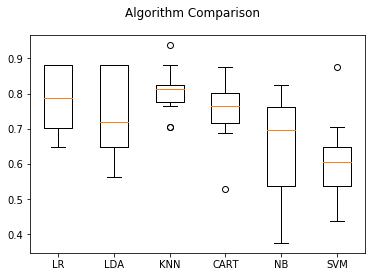

In [12]:
# 评估算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

In [13]:
# 评估算法 - 正态化数据
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])
pipelines['ScalerLDA'] = Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])
pipelines['ScalerNB'] = Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])
results = []
for key in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(pipelines[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    print('%s : %f (%f)' % (key, cv_results.mean(), cv_results.std()))

ScalerLR : 0.734191 (0.095885)
ScalerLDA : 0.746324 (0.117854)
ScalerKNN : 0.825735 (0.054511)
ScalerCART : 0.705882 (0.095828)
ScalerNB : 0.648897 (0.141868)
ScalerSVM : 0.836397 (0.088697)


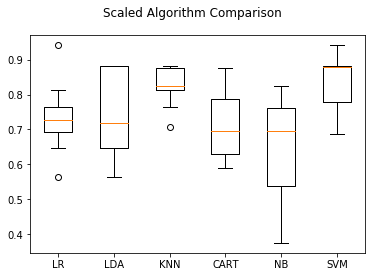

In [14]:
# 评估算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

In [15]:
# 调参改进算法 - KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))

最优：0.8493975903614458 使用{'n_neighbors': 1}
0.849398 (0.059881) with {'n_neighbors': 1}
0.837349 (0.066303) with {'n_neighbors': 3}
0.837349 (0.037500) with {'n_neighbors': 5}
0.765060 (0.089510) with {'n_neighbors': 7}
0.753012 (0.086979) with {'n_neighbors': 9}
0.734940 (0.104890) with {'n_neighbors': 11}
0.734940 (0.105836) with {'n_neighbors': 13}
0.728916 (0.075873) with {'n_neighbors': 15}
0.710843 (0.078716) with {'n_neighbors': 17}
0.722892 (0.084555) with {'n_neighbors': 19}
0.710843 (0.108829) with {'n_neighbors': 21}


In [16]:
# 调参改进算法 - SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train).astype(float)
param_grid = {}
param_grid['C'] = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
param_grid['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print('%f (%f) with %r' % (mean, std, param))

最优：0.8674698795180723 使用{'C': 1.5, 'kernel': 'rbf'}
0.759036 (0.098863) with {'C': 0.1, 'kernel': 'linear'}
0.530120 (0.118780) with {'C': 0.1, 'kernel': 'poly'}
0.572289 (0.130339) with {'C': 0.1, 'kernel': 'rbf'}
0.704819 (0.066360) with {'C': 0.1, 'kernel': 'sigmoid'}
0.746988 (0.108913) with {'C': 0.3, 'kernel': 'linear'}
0.644578 (0.132290) with {'C': 0.3, 'kernel': 'poly'}
0.765060 (0.092312) with {'C': 0.3, 'kernel': 'rbf'}
0.734940 (0.054631) with {'C': 0.3, 'kernel': 'sigmoid'}
0.740964 (0.083035) with {'C': 0.5, 'kernel': 'linear'}
0.680723 (0.098638) with {'C': 0.5, 'kernel': 'poly'}
0.789157 (0.064316) with {'C': 0.5, 'kernel': 'rbf'}
0.746988 (0.059265) with {'C': 0.5, 'kernel': 'sigmoid'}
0.746988 (0.084525) with {'C': 0.7, 'kernel': 'linear'}
0.740964 (0.127960) with {'C': 0.7, 'kernel': 'poly'}
0.813253 (0.084886) with {'C': 0.7, 'kernel': 'rbf'}
0.753012 (0.058513) with {'C': 0.7, 'kernel': 'sigmoid'}
0.759036 (0.096940) with {'C': 0.9, 'kernel': 'linear'}
0.771084 (0.

ScaledAB: 0.819853 (0.058293)
ScaledGBM: 0.841912 (0.096180)
ScaledRF: 0.698529 (0.089225)
ScaledET: 0.783088 (0.085212)


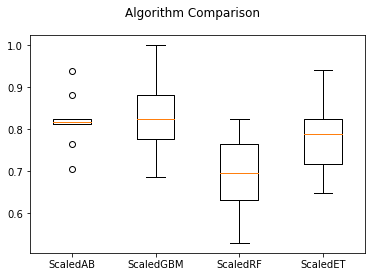

In [18]:
# 集成算法
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostClassifier())])
ensembles['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingClassifier())])
ensembles['ScaledRF'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestClassifier())])
ensembles['ScaledET'] = Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesClassifier())])

results = []
for key in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(ensembles[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))
    
# 集成算法 - 箱线图
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(ensembles.keys())
pyplot.show()

In [21]:
# 集成算法GBM - 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

最优：0.8614457831325302 使用{'n_estimators': 300}


In [20]:
# 模型最终化
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5, kernel='rbf')
model.fit(X=rescaledX, y=Y_train)
# 评估模型
rescaled_validationX = scaler.transform(X_validation)
predictions = model.predict(rescaled_validationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8571428571428571
[[23  4]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.92      0.85      0.88        27
           R       0.76      0.87      0.81        15

   micro avg       0.86      0.86      0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42

